# Prelucrarea Semnalelor
## Laborator 9
### Miu Elena Adania
### Grupa 333

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound

## Ex1.
### Importati din laboratorul anterior codul pentru a genera o serie de timp aleatoare cu cele trei componente ca in Figure 1.

In [39]:
N = 150
t = np.arange(1, N + 1)

In [40]:
trend = t**2 *  0.001 + t * 0.5
sezon = 10 * np.sin(2 * np.pi * 0.02 * t) + 5 * np.cos(2 * np.pi * 0.05 * t)
zgomot = np.random.normal(0, 1, N)

serie_timp = trend + sezon + zgomot

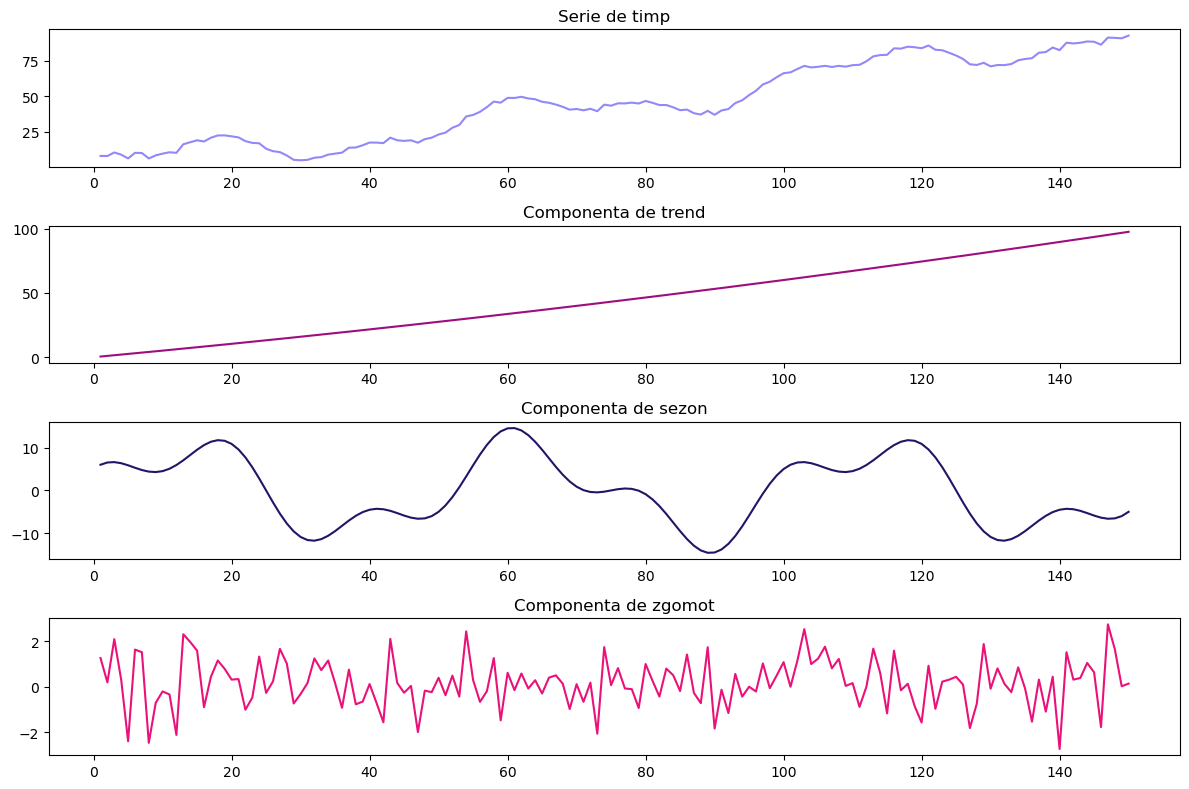

In [41]:
figure, axis = plt.subplots(4, figsize=(12, 8))

axis[0].plot(t, serie_timp, color='#9288F8')
axis[0].set_title('Serie de timp')

axis[1].plot(t, trend, color='#9F0D7F')
axis[1].set_title('Componenta de trend')

axis[2].plot(t, sezon, color='#241468')
axis[2].set_title('Componenta de sezon')

axis[3].plot(t, zgomot, color='#EA1179')
axis[3].set_title('Componenta de zgomot')

plt.tight_layout()
plt.show()

## Ex2. 
### Pentru o serie de timp generata aleator calculati noua serie rezultata din medierea exponentiala. Initial fixati α apoi gasiti voi un α optim pentru rezultate.

In [42]:
def mediere_exponentiala(x, alpha):
    s = [x[0]] 
    for t in range(1, len(x)):
        s.append(alpha * x[t] + (1 - alpha) * s[t - 1])
    return np.array(s)

In [43]:
alpha_fix = 0.2
s_fix = mediere_exponentiala(serie_timp, alpha_fix)

In [55]:
def mse_function(alpha, x):
    s = mediere_exponentiala(x, alpha)
    mse = np.sum((s[1:] - x[:-1]) ** 2)
    return mse

alpha_optim = fminbound(cost_function, 0, 1, args=(serie_timp,), full_output=True)

s_optim = mediere_exponentiala(serie_timp, alpha_optim[0])

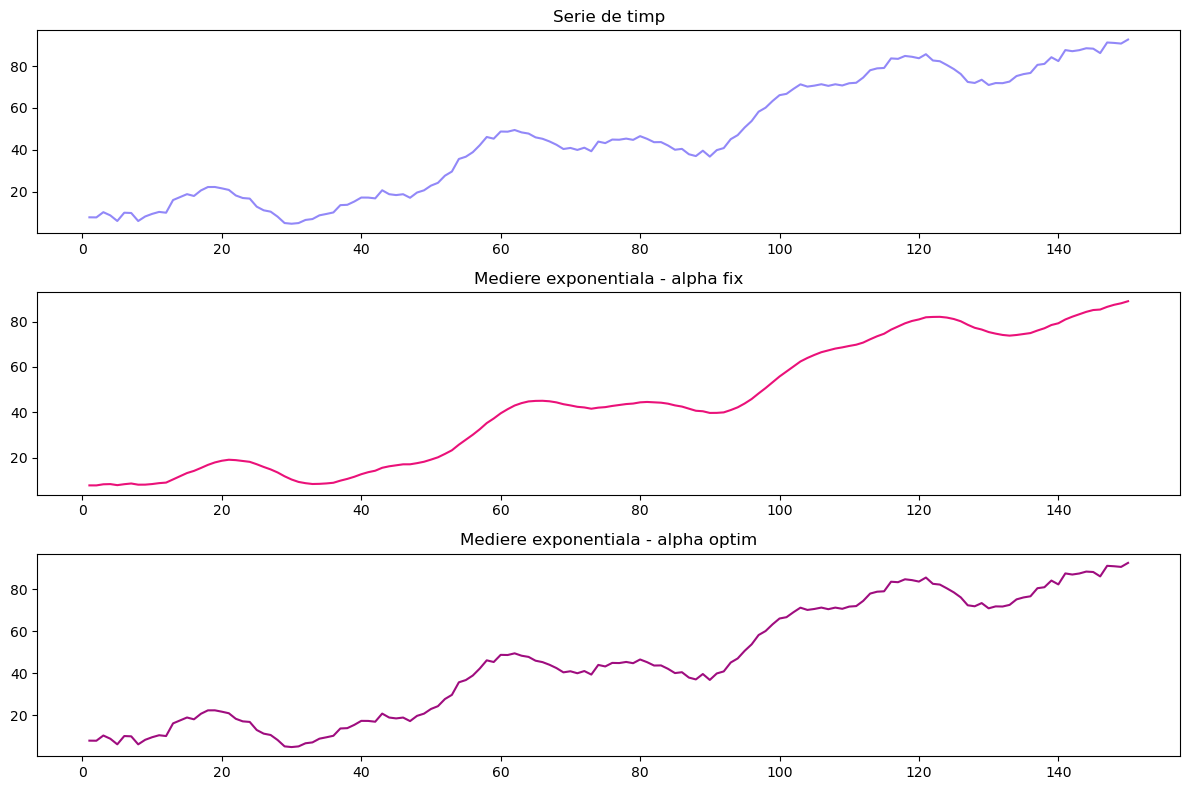

Alpha optim: 0.9999953297173838


In [54]:
figure, axis = plt.subplots(3, figsize=(12, 8))

axis[0].plot(t, serie_timp, color='#9288F8')
axis[0].set_title('Serie de timp')

axis[1].plot(t, s_fix, color='#EA1179')
axis[1].set_title('Mediere exponentiala - alpha fix')

axis[2].plot(t, s_optim, color='#9F0D7F')
axis[2].set_title('Mediere exponentiala - alpha optim')

plt.tight_layout()
plt.show()

print('Alpha optim:', alpha_optim[0])
